In [1]:
# extract poses from synthesized images and actual images and do pose evaluation on them
frames = 40

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from pathlib import Path
import os

%matplotlib inline

In [3]:
openpose_dir = Path('../src/pytorch_Realtime_Multi-Person_Pose_Estimation/')

import sys
sys.path.append(str(openpose_dir))
sys.path.append('../src/utils')

%load_ext autoreload
%autoreload 2

In [4]:
# openpose
from network.rtpose_vgg import get_model
from evaluate.coco_eval import get_multiplier, get_outputs

# utils
from openpose_utils import remove_noise, get_pose, get_joint_pose

In [5]:
weight_name = openpose_dir.joinpath('network/weight/pose_model.pth')

model = get_model('vgg19')     
model.load_state_dict(torch.load(weight_name))
model = torch.nn.DataParallel(model).cuda()
model.float()
model.eval()
pass

Bulding VGG19


../results/target/test_latest/images/label_0117_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
11377.0389820902


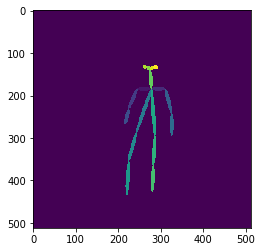

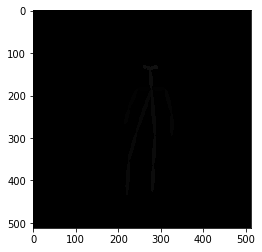

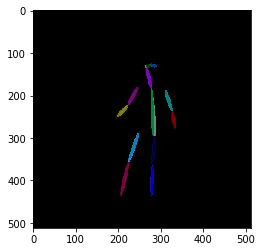

../results/target/test_latest/images/label_0118_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12584.963964986153


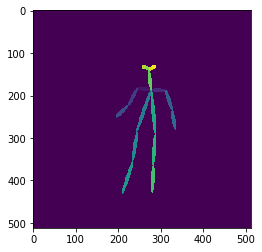

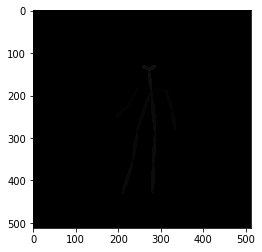

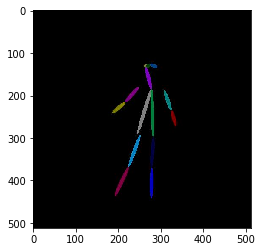

../results/target/test_latest/images/label_0119_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
11907.448131316802


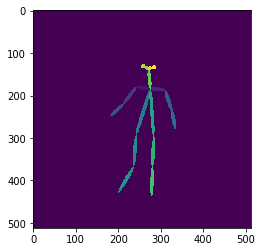

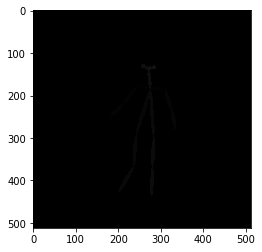

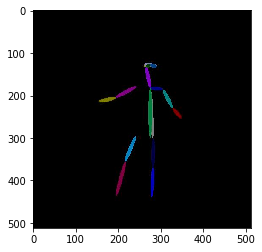

../results/target/test_latest/images/label_0120_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12785.450011634319


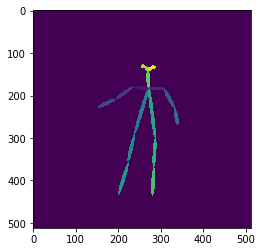

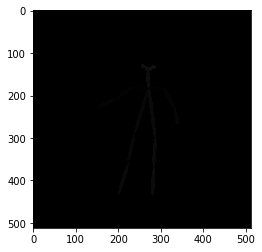

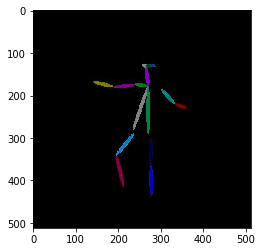

../results/target/test_latest/images/label_0121_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12636.360156310835


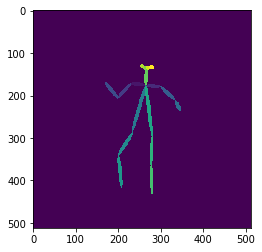

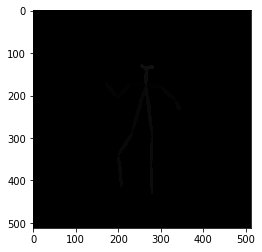

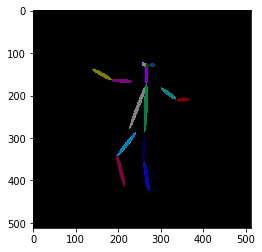

../results/target/test_latest/images/label_0122_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
13939.717357249392


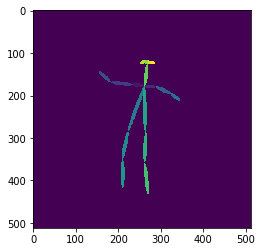

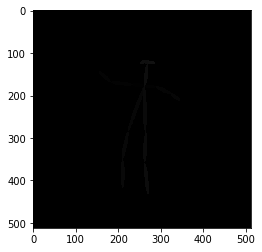

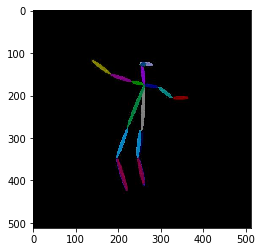

../results/target/test_latest/images/label_0123_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
13506.73402418216


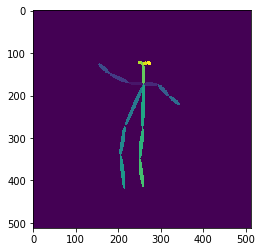

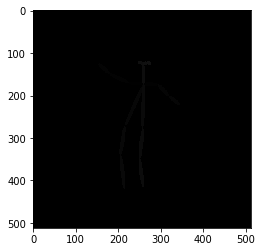

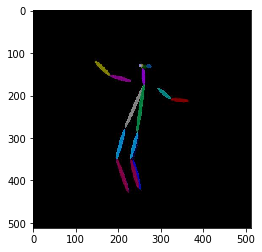

../results/target/test_latest/images/label_0124_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12349.98080970169


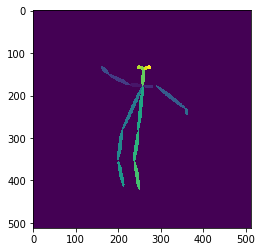

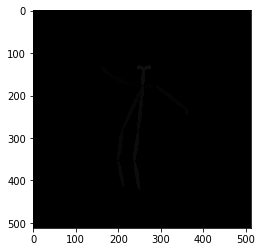

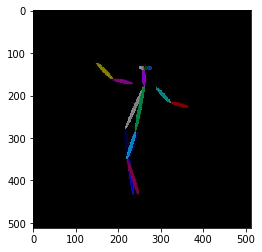

../results/target/test_latest/images/label_0125_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12533.395589384387


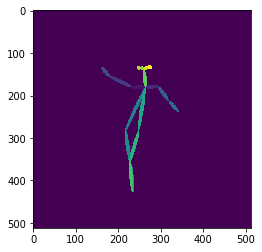

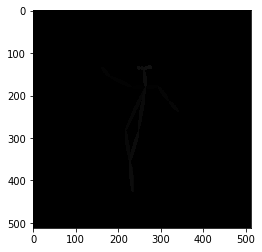

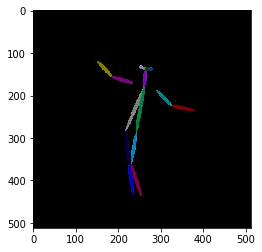

../results/target/test_latest/images/label_0126_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12912.367133875958


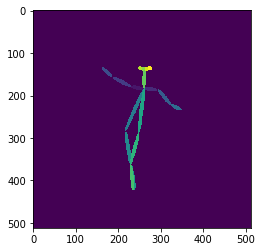

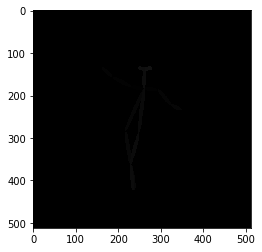

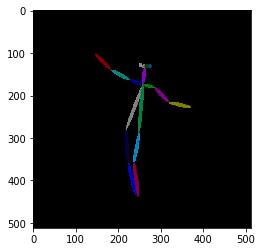

../results/target/test_latest/images/label_0127_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12964.469522506502


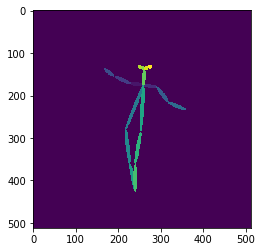

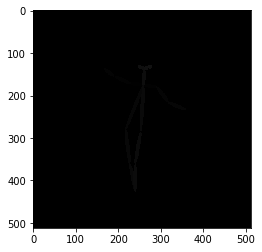

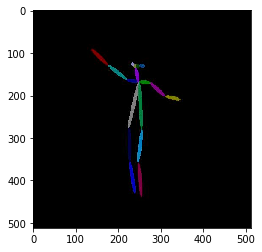

../results/target/test_latest/images/label_0128_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12830.242982890075


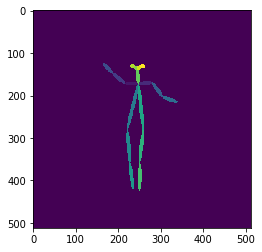

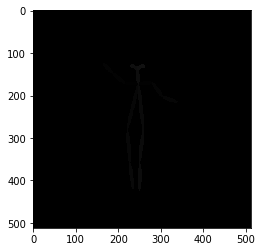

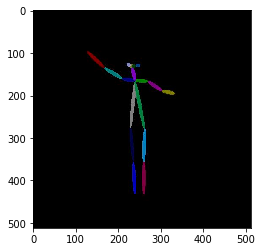

../results/target/test_latest/images/label_0129_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
11816.949183270614


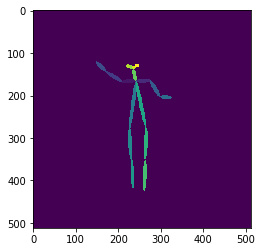

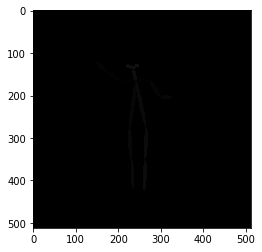

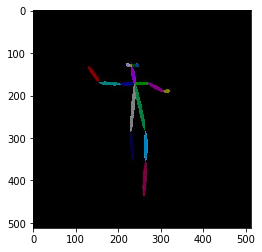

../results/target/test_latest/images/label_0130_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
11616.338579776331


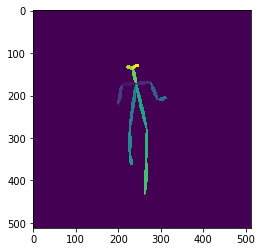

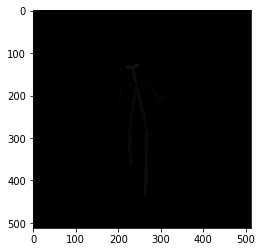

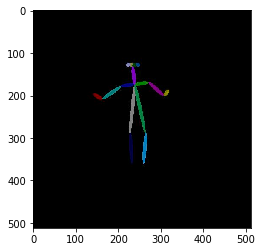

../results/target/test_latest/images/label_0131_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12823.642930150543


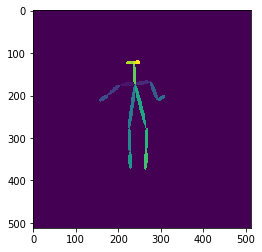

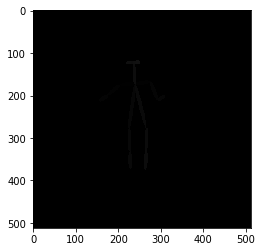

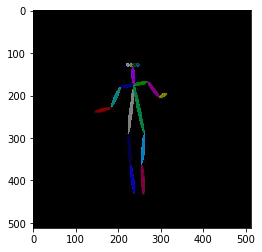

../results/target/test_latest/images/label_0132_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12639.34622518111


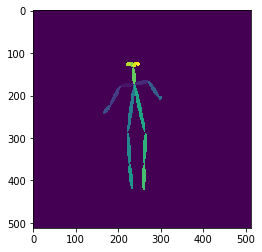

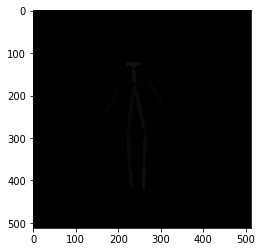

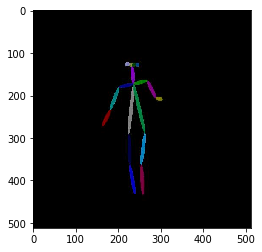

../results/target/test_latest/images/label_0133_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12857.665690163203


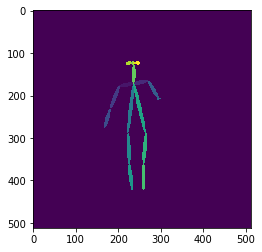

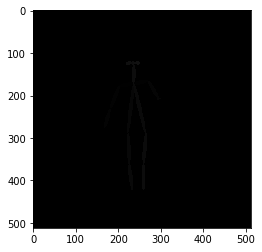

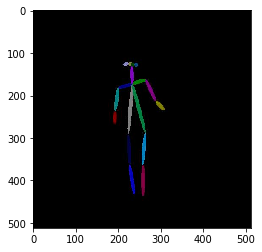

../results/target/test_latest/images/label_0134_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12993.193487360988


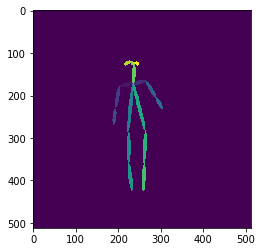

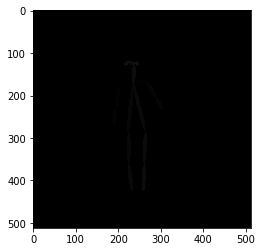

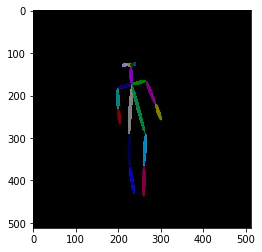

../results/target/test_latest/images/label_0135_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12879.30495019044


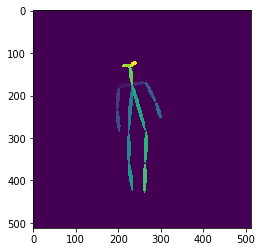

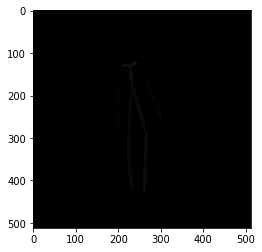

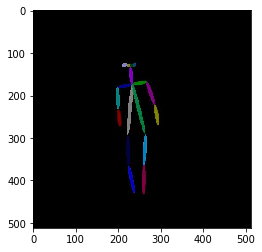

../results/target/test_latest/images/label_0136_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
13026.344383594347


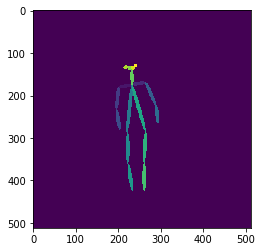

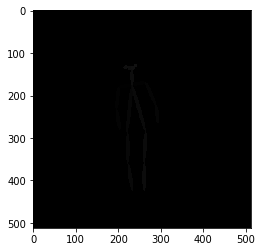

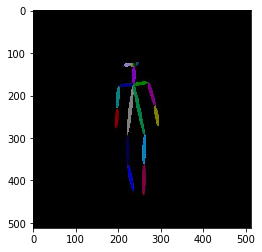

../results/target/test_latest/images/label_0137_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12968.561408267302


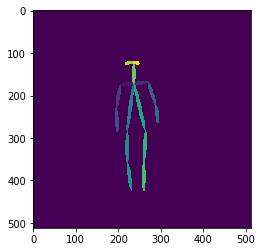

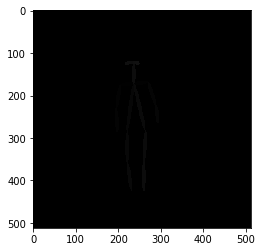

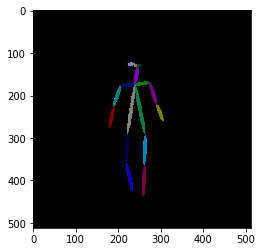

../results/target/test_latest/images/label_0138_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12912.104437309978


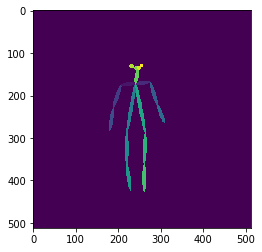

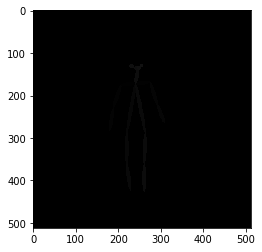

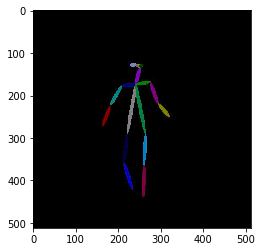

../results/target/test_latest/images/label_0139_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
13062.823086913488


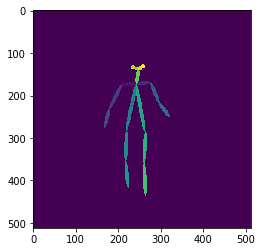

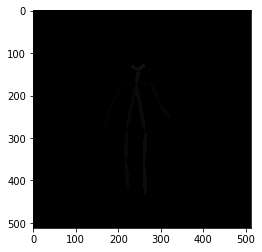

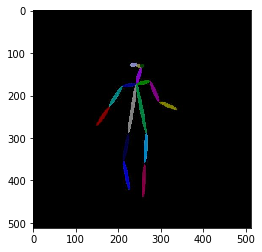

../results/target/test_latest/images/label_0140_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
13040.365370648171


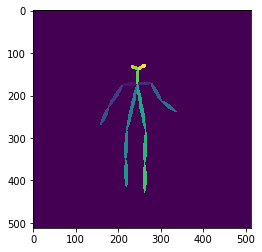

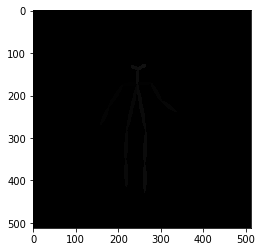

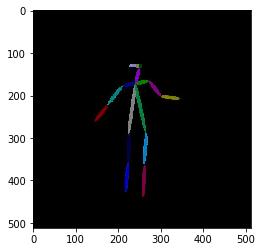

../results/target/test_latest/images/label_0141_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12885.654969771618


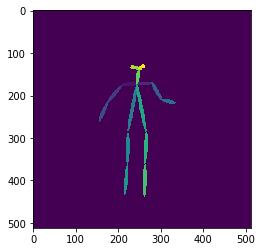

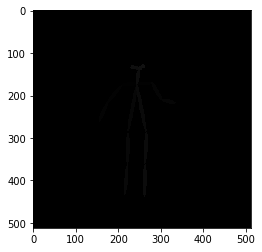

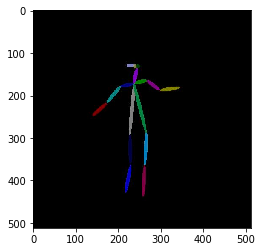

../results/target/test_latest/images/label_0142_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12964.52910830162


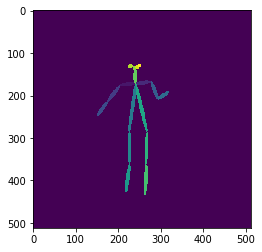

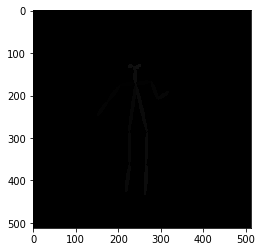

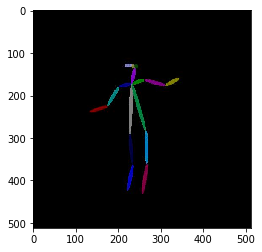

../results/target/test_latest/images/label_0143_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12947.812517950668


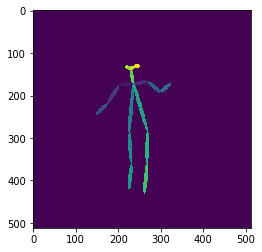

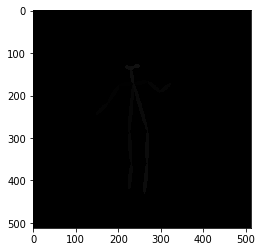

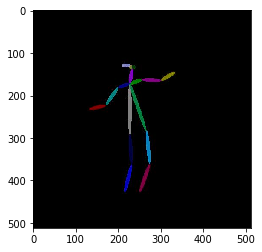

../results/target/test_latest/images/label_0144_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12799.7605446352


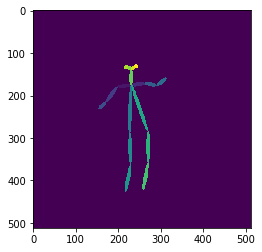

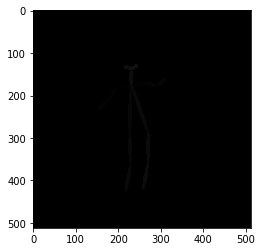

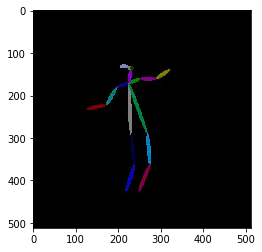

../results/target/test_latest/images/label_0145_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12603.38748114966


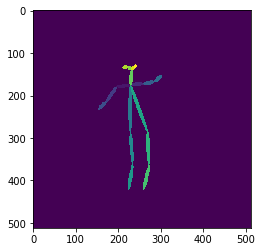

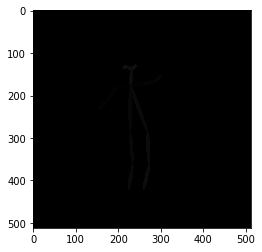

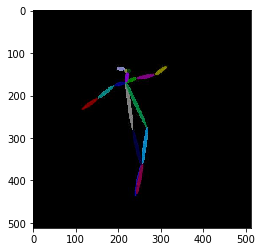

../results/target/test_latest/images/label_0146_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12233.890182603405


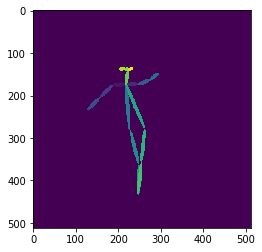

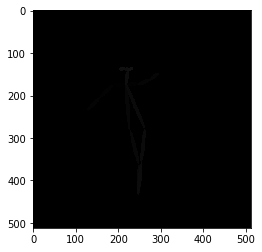

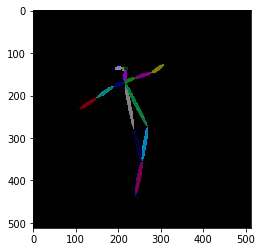

../results/target/test_latest/images/label_0147_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12431.710743095658


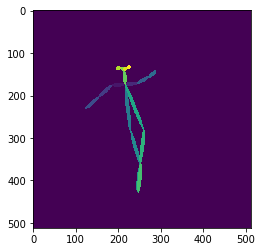

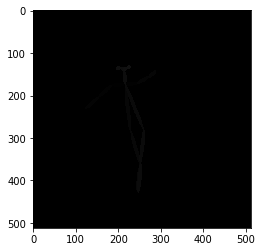

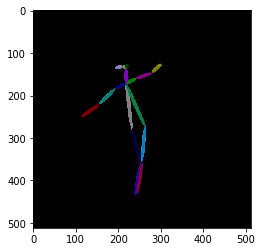

../results/target/test_latest/images/label_0148_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12598.814150546074


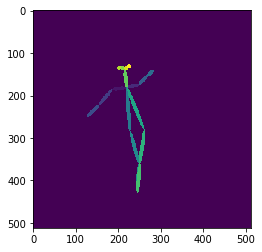

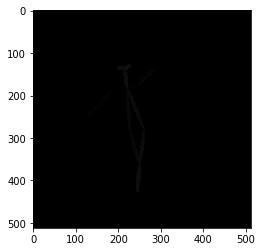

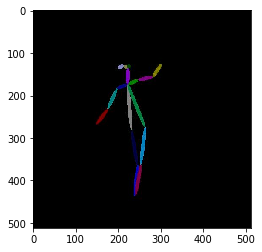

../results/target/test_latest/images/label_0149_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12603.846952418931


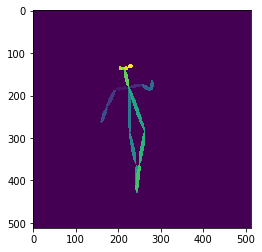

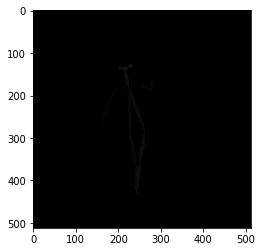

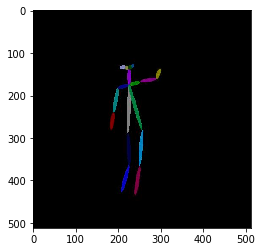

../results/target/test_latest/images/label_0150_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12614.606930063259


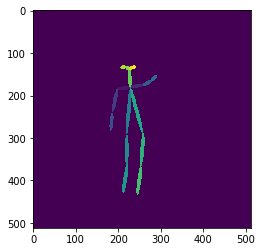

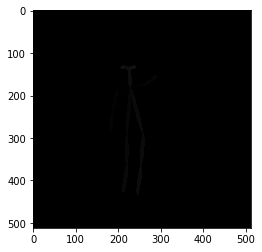

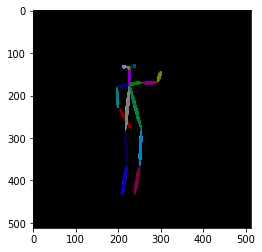

../results/target/test_latest/images/label_0151_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12742.825903228844


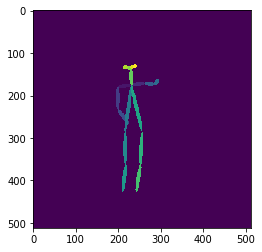

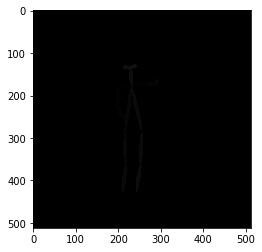

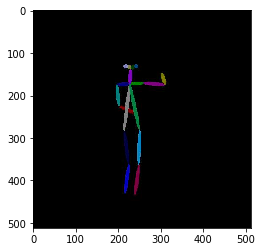

../results/target/test_latest/images/label_0152_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12644.695607249705


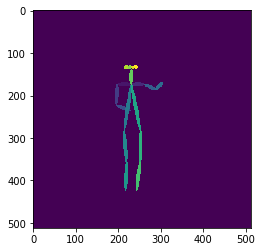

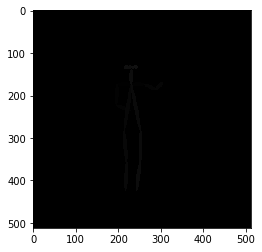

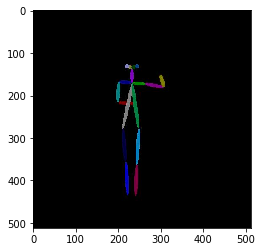

../results/target/test_latest/images/label_0153_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12757.31327513752


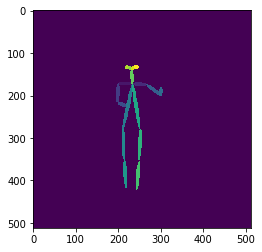

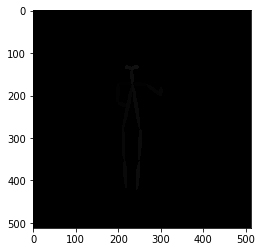

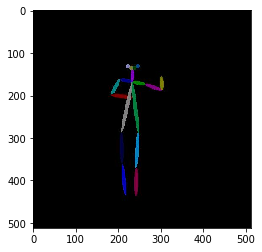

../results/target/test_latest/images/label_0154_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12532.405355716835


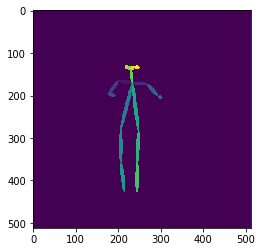

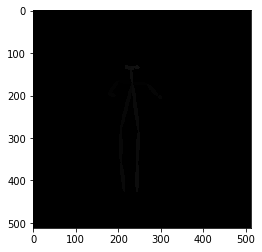

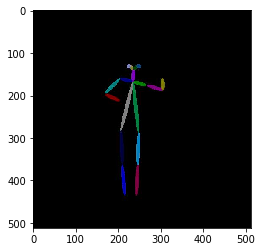

../results/target/test_latest/images/label_0155_synthesized_image.jpg
(512, 512, 3)
(512, 512, 3)
(512, 512)
12438.553211688246


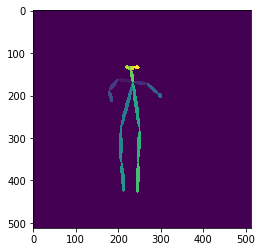

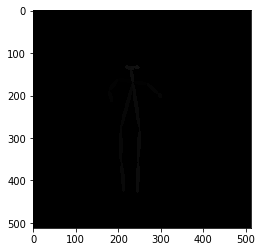

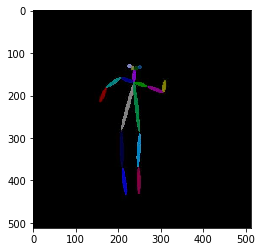

../results/target/test_latest/images/label_0156_synthesized_image.jpg
(512, 512, 3)


AttributeError: 'NoneType' object has no attribute 'shape'

In [38]:
synth_num = 117
synth_img_dir = '../results/target/test_latest/images' #'../results/test2'
#real_label_dir = '../data/source/test_label'
#real_label_dir = '../results/test2'
real_label_dir = '../results/target/test_latest/images'


save_dir = '../results/poseeval2/'

l2norm_arr = []
x_arr = []

for idx in range(frames):
    #num = str(os.listdir(real_label_dir)[idx]) # have to only get synth
    #num = num[-8:-4] # for PNGs
    #synth_img_name = synth_img_dir + '/' + 'synth_image_' + num + '.png'
    synth_img_name = synth_img_dir + '/' + 'label_' + '{:04d}'.format(synth_num) + '_synthesized_image'+ '.jpg'
    synth_num += 1
    print(synth_img_name)
    #real_label_name = real_label_dir + '/input_label_' + num + '.png'#os.listdir(real_label_dir)[idx]
    real_label_name = real_label_dir + '/label_' + '{:04d}'.format(synth_num) + '_input_label'+ '.jpg'

    real_label = cv2.imread(real_label_name)
    
    # find synth_label aka pose for synth_img
    synth_img = cv2.imread(synth_img_name)
    shape_dst = np.min(synth_img.shape[:2])
    oh = (synth_img.shape[0] - shape_dst) // 2
    ow = (synth_img.shape[1] - shape_dst) // 2

    synth_img = synth_img[oh:oh+shape_dst, ow:ow+shape_dst]
    synth_img = cv2.resize(synth_img, (512, 512))
    multiplier = get_multiplier(synth_img)
    with torch.no_grad():
        paf, heatmap = get_outputs(multiplier, synth_img, model, 'rtpose')
    r_heatmap = np.array([remove_noise(ht)
                      for ht in heatmap.transpose(2, 0, 1)[:-1]])\
                     .transpose(1, 2, 0)
    heatmap[:, :, :-1] = r_heatmap
    param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}
    synth_label = get_pose(param, heatmap, paf)
    cv2.imwrite(save_dir + 'poseeval_' + num + '.png', synth_label)
    
    #cv2.imwrite(str(save_dir.joinpath('/poseeval_{:04d}.png'.format(idx))), synth_label)

    synth_final = cv2.imread(save_dir + 'poseeval_' + num + '.png')
    print(synth_final.shape)




    print(real_label.shape)
    print(synth_label.shape)
    l2norm = cv2.norm(real_label, synth_final)
    print(l2norm)
    l2norm_arr.append(l2norm)
    x_arr.append(idx)

    plt.imshow(synth_label)
    plt.show()
    plt.imshow(synth_final)
    plt.show()
    plt.imshow(real_label)
    plt.show()
    
plt.plot(x_arr, l2norm_arr, 'bs')
plt.xlabel('Image')
plt.ylabel('L2 normalization value')
plt.title('Pose evaluation using L2 norms')
plt.show()

torch.cuda.empty_cache()    